# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [5]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [7]:
# Importing the file porter_data_1.csv

file_path = "porter_data_1.csv"  
df = pd.read_csv(file_path)

df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [8]:
df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

(None,
            market_id  store_primary_category  order_protocol    total_items  \
 count  175777.000000           175777.000000   175777.000000  175777.000000   
 mean        2.743726               35.887949        2.911752       3.204976   
 std         1.330963               20.728254        1.513128       2.674055   
 min         1.000000                0.000000        1.000000       1.000000   
 25%         2.000000               18.000000        1.000000       2.000000   
 50%         2.000000               38.000000        3.000000       3.000000   
 75%         4.000000               55.000000        4.000000       4.000000   
 max         6.000000               72.000000        7.000000     411.000000   
 
             subtotal  num_distinct_items  min_item_price  max_item_price  \
 count  175777.000000       175777.000000   175777.000000   175777.000000   
 mean     2697.111147            2.675060      684.965433     1160.158616   
 std      1828.554893            1.62568

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [15]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [18]:
# Convert categorical features to category type

categorical_features = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_features:
    df[col] = df[col].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [22]:
# Calculate time taken in minutes

df["time_taken"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [25]:
# Extract the hour and day of week from the 'created_at' timestamp


df["order_hour"] = df["created_at"].dt.hour
df["order_day"] = df["created_at"].dt.day_name()

# Create a categorical feature 'isWeekend'
df["isWeekend"] = df["order_day"].isin(["Saturday", "Sunday"]).astype(int)

In [27]:
# Drop unnecessary columns
df = df.drop(columns=["created_at", "actual_delivery_time", "order_day"])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [31]:
# Define target variable (y) and features (X)

y = df["time_taken"] 

# excluding target and non-numeric categorical columns
X = df.drop(columns=["time_taken"])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [34]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns 

# Reorder columns to match training set
X_test = X_test[X_train.columns]


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [38]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["category", "object"]).columns.tolist()


if "time_taken" in numerical_cols:
    numerical_cols.remove("time_taken")


print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

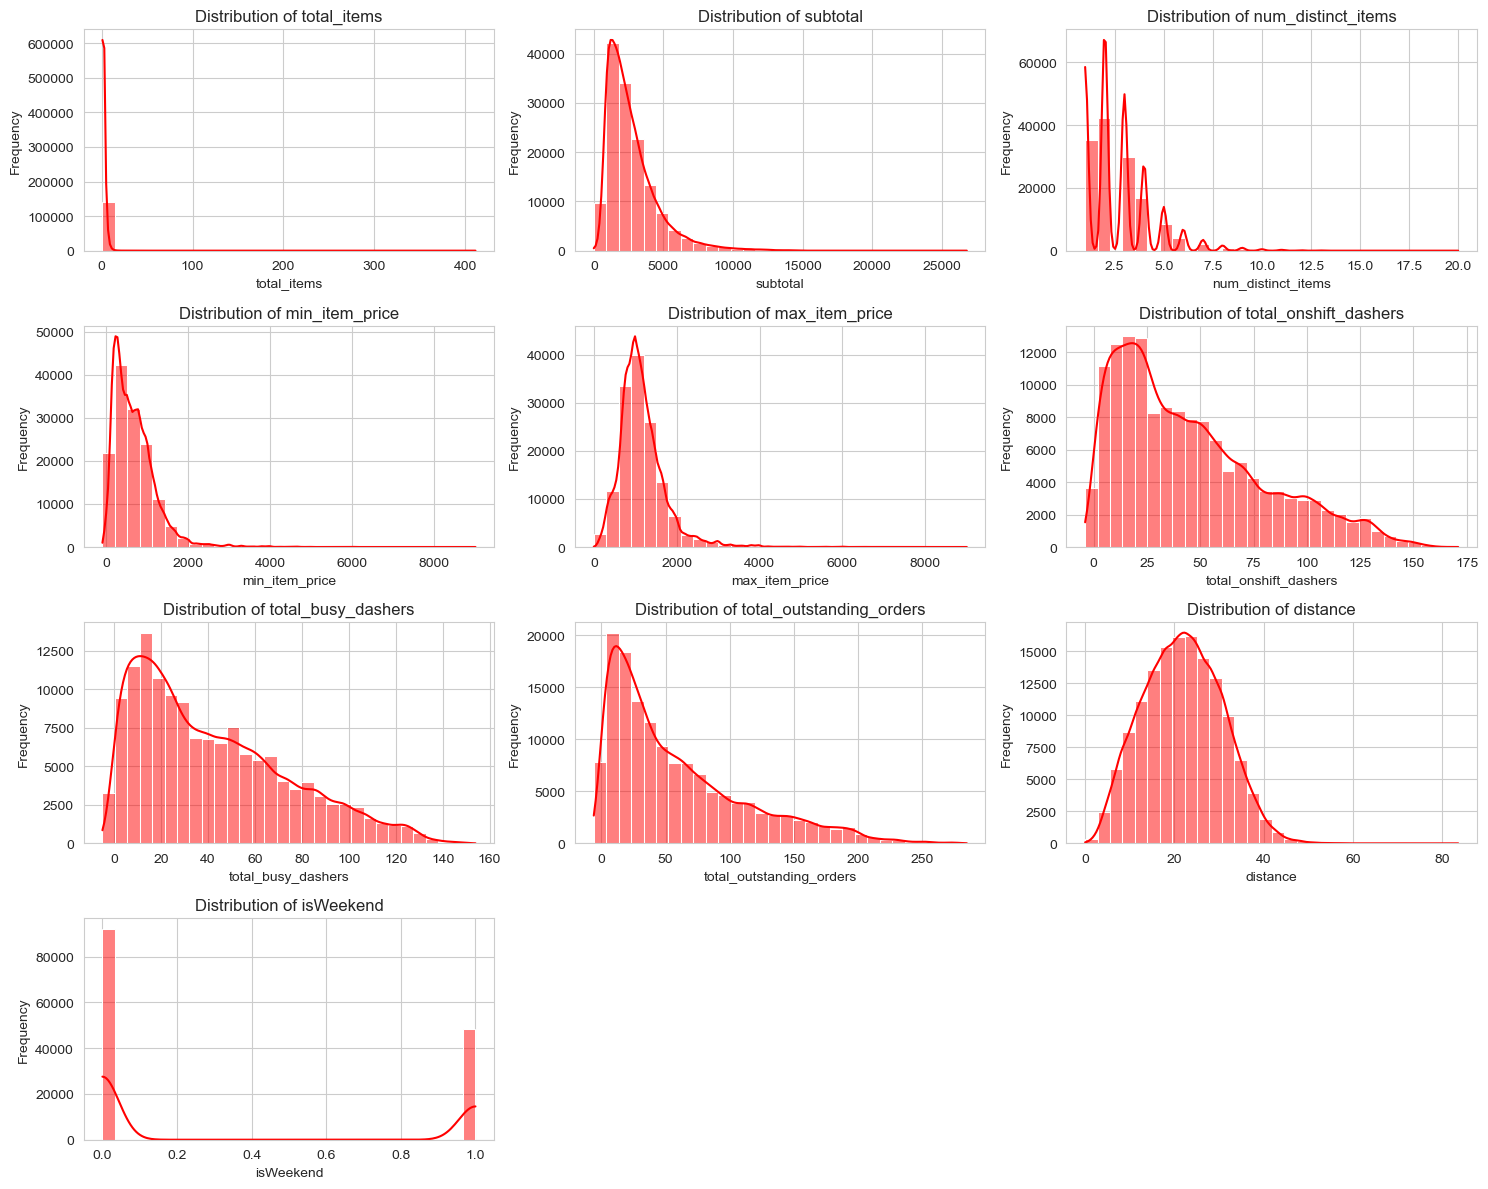

In [41]:
# Plot distributions for all numerical columns

sns.set_style("whitegrid")


plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_train[col], bins=30, kde=True, color="red")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

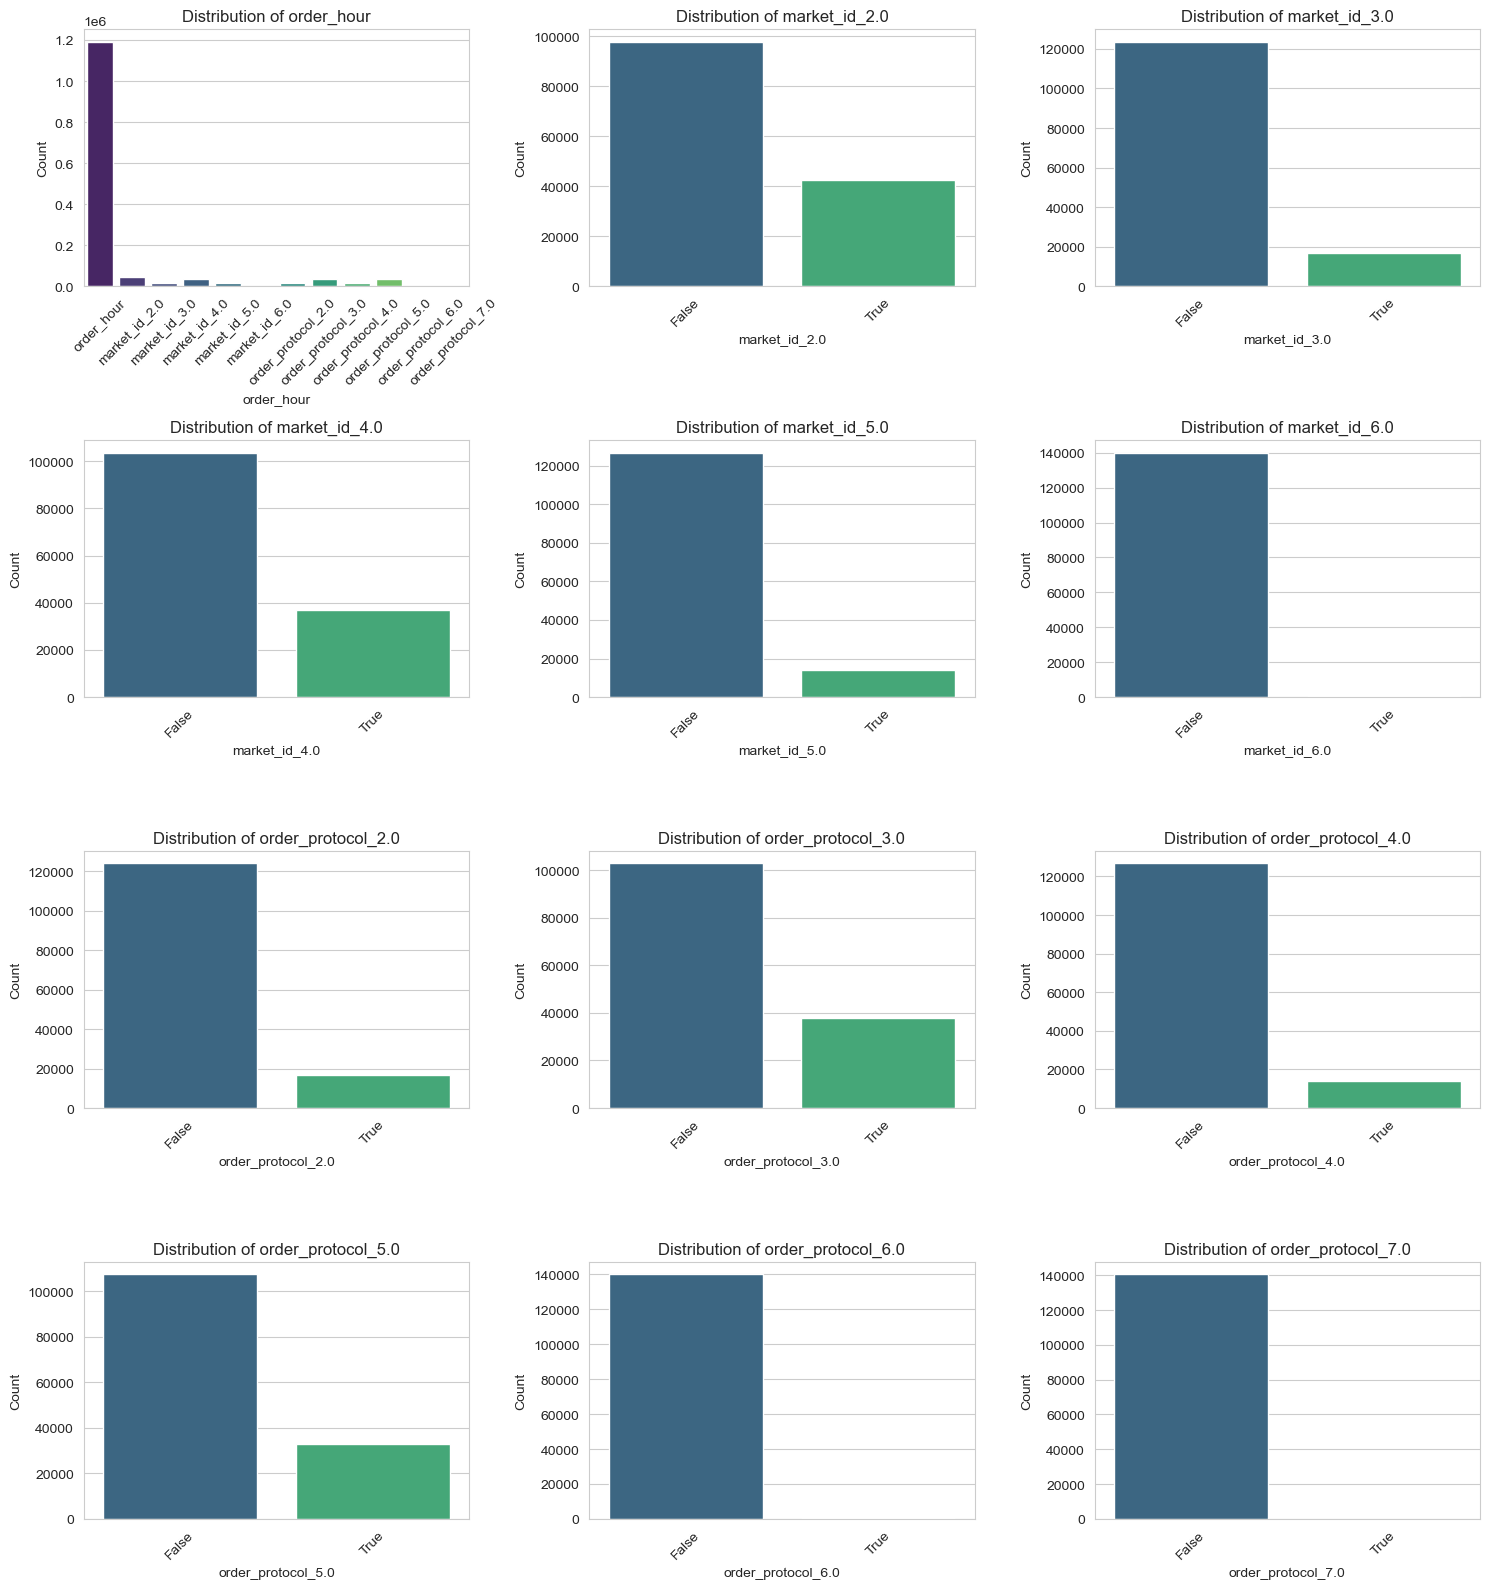

In [50]:
# Distribution of categorical columns

import warnings
import math

warnings.filterwarnings("ignore")

categorical_cols = ["order_protocol", "order_hour"]
categorical_cols += [col for col in X_train.columns if "market_id" in col]  
categorical_cols += [col for col in X_train.columns if "order_protocol" in col]  

categorical_cols = [col for col in categorical_cols if col in X_train.columns]

num_plots = len(categorical_cols)
num_cols = 3  
num_rows = math.ceil(num_plots / num_cols)  
plt.figure(figsize=(num_cols * 5, num_rows * 4))

category_sums = X_train[categorical_cols].sum()

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  

   
    if X_train[col].nunique() > 2:  
        sns.barplot(x=category_sums.index, y=category_sums.values, palette="viridis")
    else:
        sns.countplot(x=X_train[col], palette="viridis", order=X_train[col].value_counts().index)

    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")

plt.tight_layout() 
plt.show()




##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

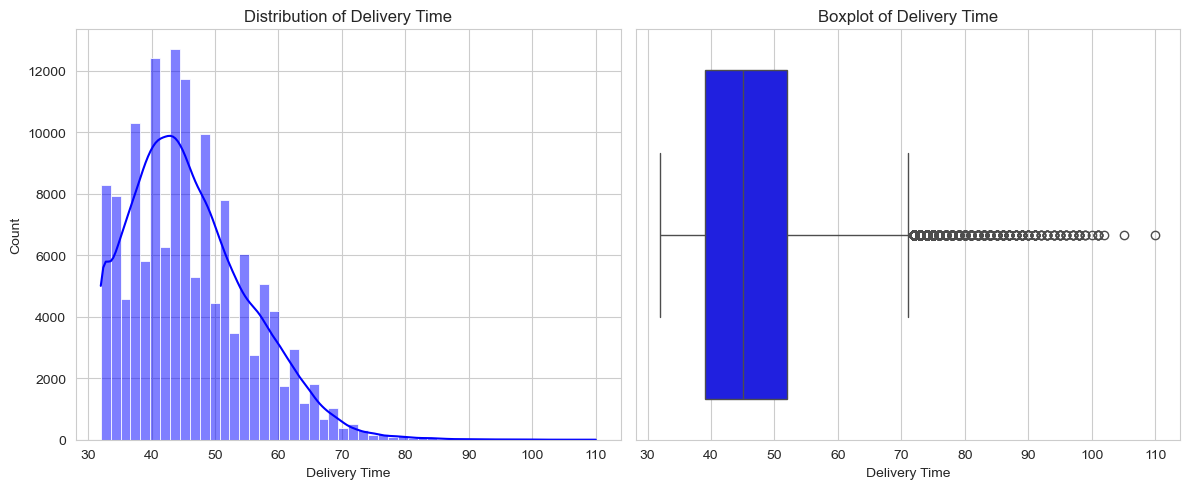

In [60]:
# Distribution of time_taken


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=50, kde=True, color="blue")
plt.xlabel("Delivery Time")
plt.ylabel("Count")
plt.title("Distribution of Delivery Time")

# Boxplot to check for outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=y_train, color="blue")
plt.xlabel("Delivery Time")
plt.title("Boxplot of Delivery Time")

plt.tight_layout()
plt.show()






#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

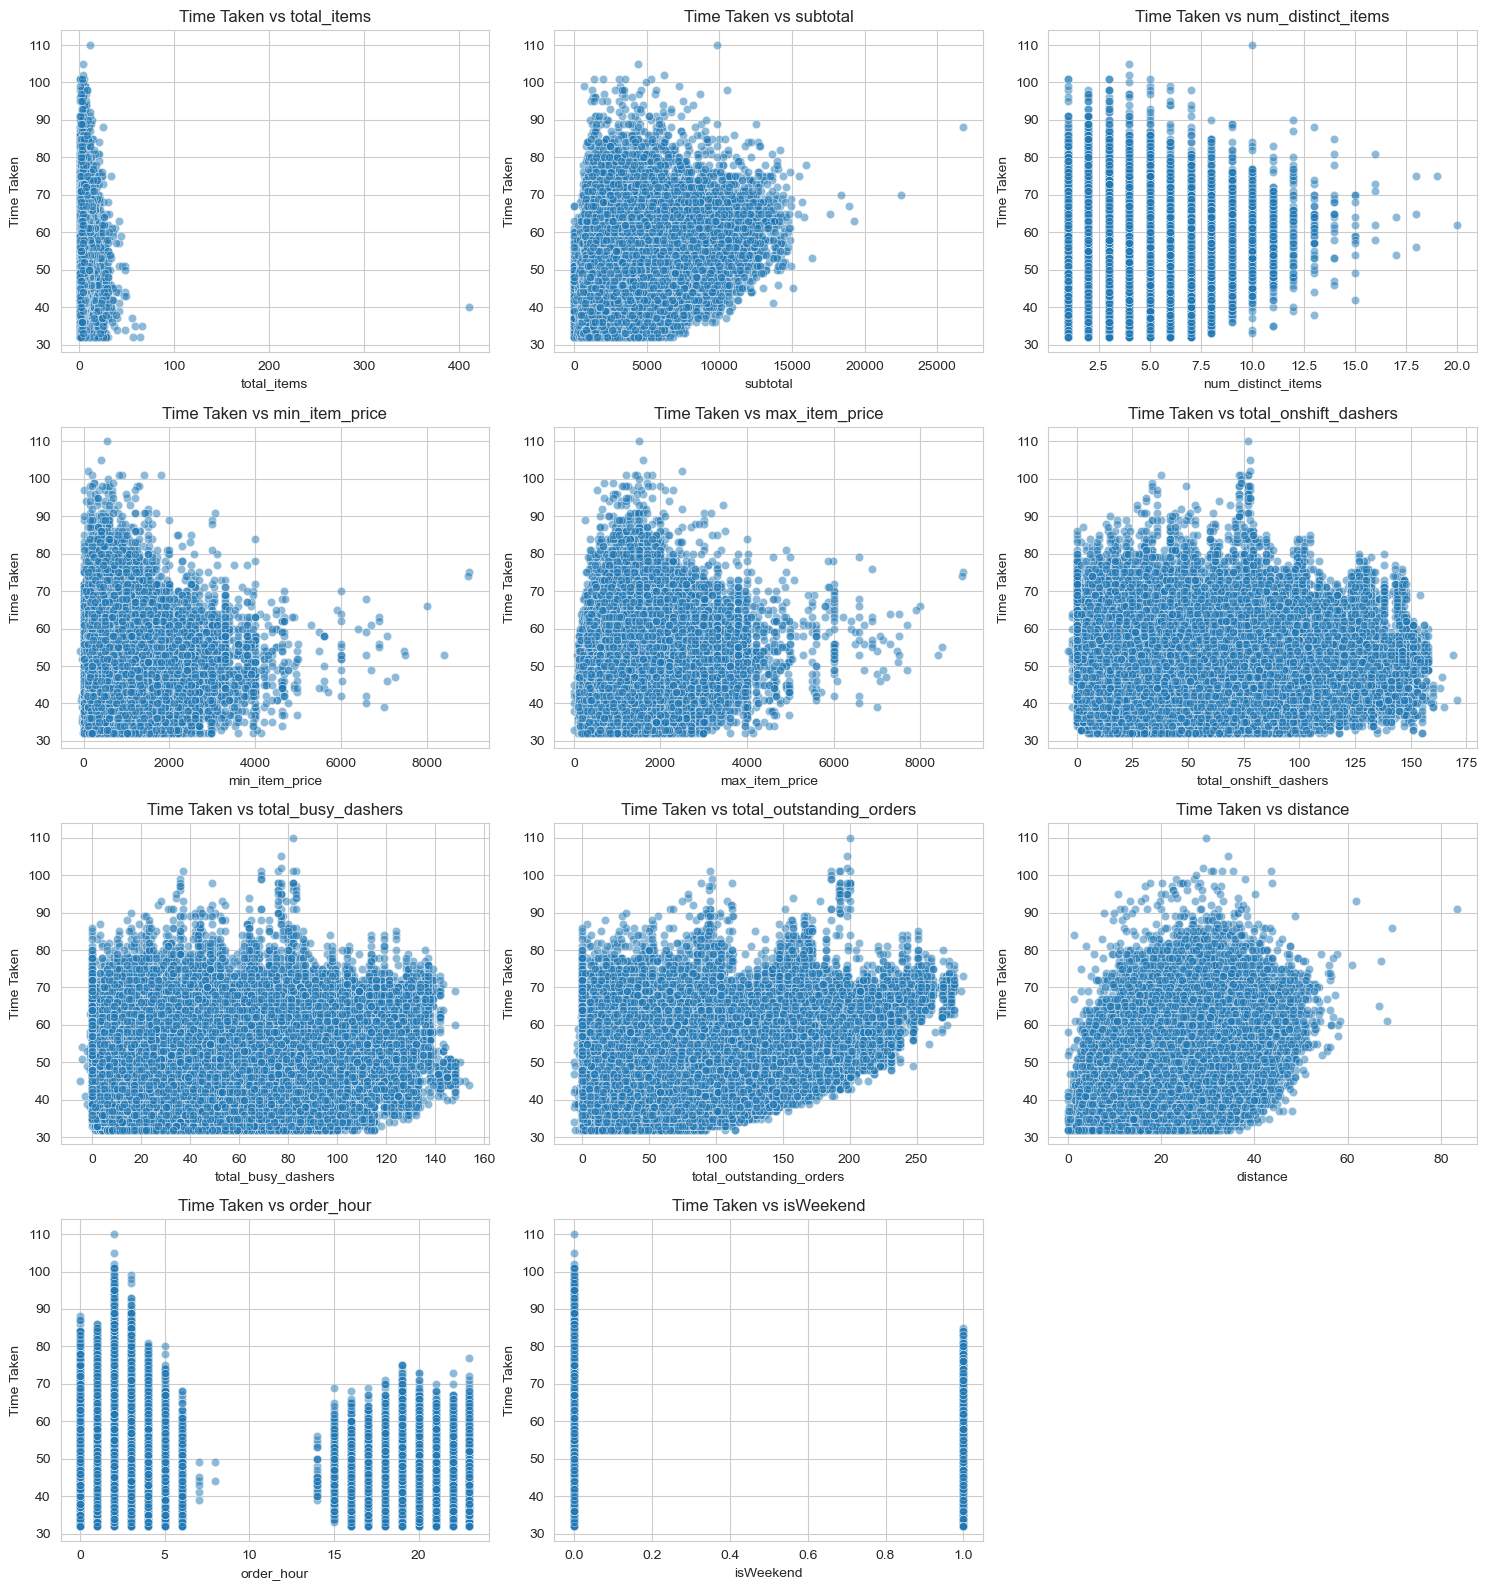

In [52]:
# Scatter plot to visualise the relationship between time_taken and other features


y_train = y_train.rename("time_taken")
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure target variable is named correctly
y_train = y_train.rename("time_taken")

# Get all numerical features
numerical_features = X_train.select_dtypes(include=['number']).columns

# Determine number of rows and columns for subplots dynamically
num_features = len(numerical_features)
num_cols = 3  # Set number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate required rows

plt.figure(figsize=(num_cols * 5, num_rows * 4))

# Loop through each numerical feature and create scatter plots
for i, col in enumerate(numerical_features, 1):  
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Time Taken")
    plt.title(f"Time Taken vs {col}")

plt.tight_layout()
plt.show()


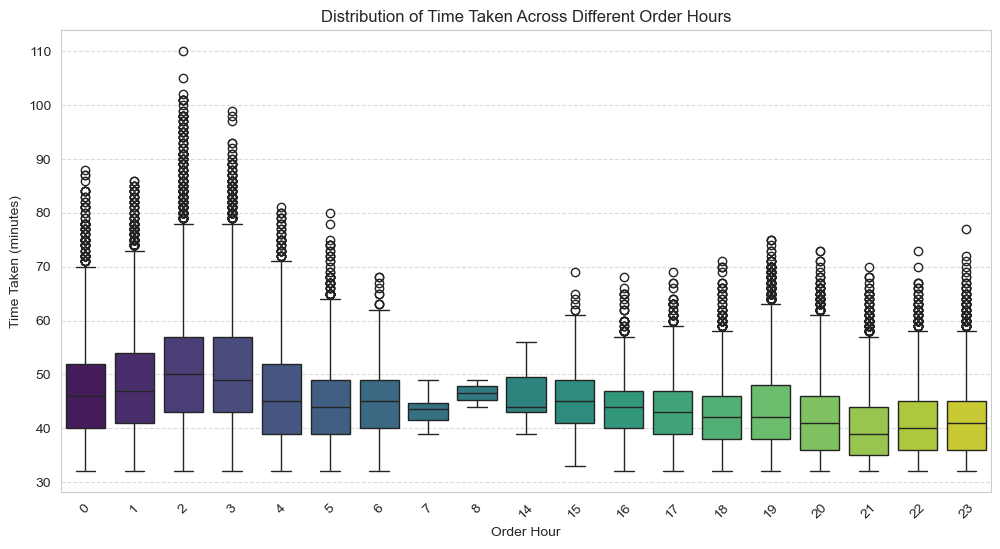

In [64]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train["order_hour"], y=y_train, palette="viridis")
plt.xlabel("Order Hour")
plt.ylabel("Time Taken (minutes)")
plt.title("Distribution of Time Taken Across Different Order Hours")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()







#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

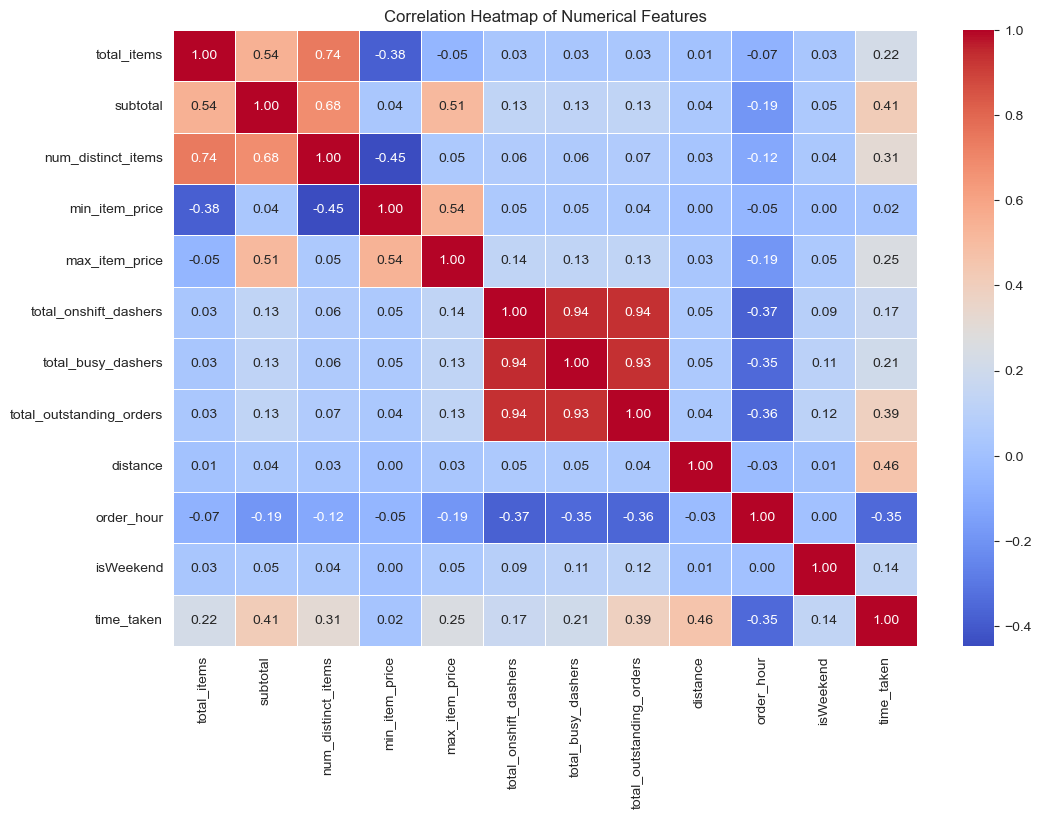

In [68]:
# Plot the heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt


numerical_cols = X_train.select_dtypes(include=["number"]).columns  
X_train_numeric = X_train[numerical_cols].copy()
X_train_numeric["time_taken"] = y_train  


corr_matrix = X_train_numeric.corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()




##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [70]:
# Drop 3-5 weakly correlated columns from training dataset

# Define weakly correlated columns to drop
weak_columns = ["min_item_price", "max_item_price", "total_onshift_dashers", "total_busy_dashers", "isWeekend"]

# Drop these columns from X_train and X_test
X_train = X_train.drop(columns=weak_columns)
X_test = X_test.drop(columns=weak_columns)

print("Dropped columns:", weak_columns)


Dropped columns: ['min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

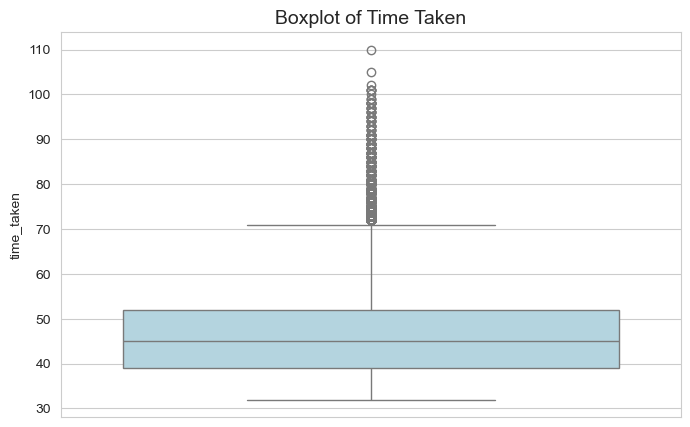

In [73]:
# Boxplot for time_taken


# Set figure size
plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train, color="lightblue")
plt.title("Boxplot of Time Taken", fontsize=14)
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [75]:
# Handle outliers
import numpy as np


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()


X_train_cleaned = remove_outliers_iqr(X_train, numerical_cols)
y_train_cleaned = y_train.loc[X_train_cleaned.index]  

print(f"Original Shape: {X_train.shape}, New Shape: {X_train_cleaned.shape}")







Original Shape: (140621, 89), New Shape: (124444, 89)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [77]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [80]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [82]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [84]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [86]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [88]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [91]:
# Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm





#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [93]:
# Apply scaling to the numerical columns

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_cleaned)

X_test_scaled = scaler.transform(X_test)



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [97]:
# Create/Initialise the model

X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

sm_model = sm.OLS(y_train_cleaned, X_train_const).fit()

print(sm_model.summary())





                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1930.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:28:32   Log-Likelihood:            -3.9019e+05
No. Observations:              124444   AIC:                         7.806e+05
Df Residuals:                  124355   BIC:                         7.814e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0128      0.016   2852.265      0.0

In [98]:
# Train the model using the training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_cleaned)

print("Model training complete!")


Model training complete!


In [99]:
# Make predictions


missing_cols = set(X_train_cleaned.columns) - set(X_test.columns)
extra_cols = set(X_test.columns) - set(X_train_cleaned.columns)


for col in missing_cols:
    X_test[col] = 0

X_test = X_test[X_train_cleaned.columns]

print("X_train_cleaned shape:", X_train_cleaned.shape)
print("X_test shape after column alignment:", X_test.shape)




X_train_cleaned shape: (124444, 89)
X_test shape after column alignment: (35156, 89)


In [100]:
# Apply the same scaler used on X_train_cleaned
X_test_scaled = scaler.transform(X_test)
X_test_const = sm.add_constant(X_test_scaled)

print("X_test_const shape:", X_test_const.shape)


X_test_const shape: (35156, 89)


In [101]:
# Make predictions
X_test_const = sm.add_constant(X_test_scaled, has_constant="add")

print("X_test_const shape:", X_test_const.shape)  

# Now, make predictions
y_pred_sm = sm_model.predict(X_test_const)

print("Predictions complete!")


X_test_const shape: (35156, 90)
Predictions complete!


In [102]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred_sm)
mse = mean_squared_error(y_test, y_pred_sm)
rmse = mean_squared_error(y_test, y_pred_sm, squared=False)
r2 = r2_score(y_test, y_pred_sm)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 4.43
Mean Squared Error (MSE): 33.70
Root Mean Squared Error (RMSE): 5.80
R-squared (R²): 0.6150


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

num_features_list = []
rmse_list = []
max_features = 10
rfe = RFE(LinearRegression(), n_features_to_select=max_features, step=2) 
rfe.fit(X_train_scaled, y_train_cleaned)
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]


lr_model = LinearRegression()
lr_model.fit(X_train_rfe, y_train_cleaned)

# Make predictions
y_pred_rfe = lr_model.predict(X_test_rfe)


rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfe))

print(f"Selected Features: {max_features}, RMSE: {rmse:.4f}")


selected_features = X_train.columns[rfe.support_]
print("\nFinal Selected Features:", list(selected_features))




Selected Features: 10, RMSE: 5.8658

Final Selected Features: ['subtotal', 'total_outstanding_orders', 'distance', 'order_hour', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'order_protocol_3.0', 'order_protocol_5.0']


In [121]:
# Build the final model with selected number of features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

best_num_features = 8
rfe = RFE(LinearRegression(), n_features_to_select=best_num_features)
rfe.fit(X_train_scaled, y_train_cleaned)

selected_features = X_train.columns[rfe.support_]
print("\nFinal Selected Features:", list(selected_features))

X_train_final = X_train_scaled[:, rfe.support_]
X_test_final = X_test_scaled[:, rfe.support_]

# Train the final model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_cleaned)

# Make predictions
y_pred_final = final_model.predict(X_test_final)

print("Final model trained successfully with 8 selected features!")






Final Selected Features: ['subtotal', 'total_outstanding_orders', 'distance', 'order_hour', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0']
Final model trained successfully with 8 selected features!


In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

# Print final results
print(f"\nFinal Model Metrics with {best_num_features} Selected Features:")
print(f"Mean Absolute Error (MAE): {mae_final:.2f}")
print(f"Mean Squared Error (MSE): {mse_final:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.2f}")
print(f"R-squared (R²): {r2_final:.4f}")



Final Model Metrics with 8 Selected Features:
Mean Absolute Error (MAE): 4.56
Mean Squared Error (MSE): 35.69
Root Mean Squared Error (RMSE): 5.97
R-squared (R²): 0.5922


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

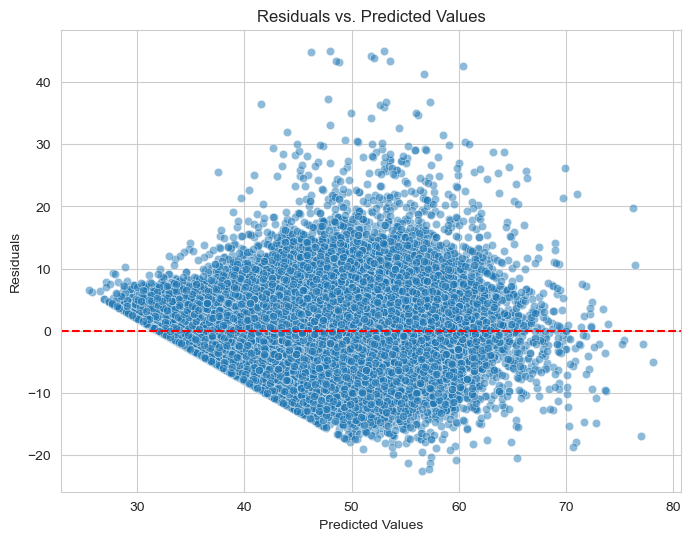

In [132]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Compute residuals
residuals = y_test - y_pred_final
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")  
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [144]:
# Compare the scaled vs unscaled features used in the final model




Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [148]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
- Market_ids - Different locations, different delivery times – Some areas take longer for deliveries because of stuff like traffic, how many restaurants are around, or just how things are run there.  

- order_protocols- How you order can slow things down– Some ways of placing orders might take longer because of how the system handles them, maybe assigning drivers differently or adding extra steps.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the dataset is used for testing, while 80% is used for training when splitting the data. This ensures the model is trained on most of the data but still has unseen data to evaluate its performance.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>distance typically has the highest positive correlation with delivery_time. This makes sense because longer distances naturally lead to longer delivery time



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>boxplots , Histograms and Z-score Check were few approaches i took to understand the outliers. removed unrealistic numbers – If something looked totally wrong (like a delivery distance of 500 km), I dropped it.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>distance, subtotal and total_outstanding_orders

distance - The farther the restaurant is, the longer the delivery takes. This is expected since travel time directly impacts delivery duration.

Subtotal → Higher order amounts may indicate larger or more complex orders
, which could take longer to prepare and deliver.

total_outstanding_orders → If many orders are pending, it means the delivery system is busy, leading to potential delays.





---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression - Has one independent variable 
>Multiple Linear Regression - Has two or more independent variables 



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function measures the error between predicted and actual values. In Linear Regression, we use MSE
>The algorithm uses Gradient Descent  to adjust coefficients and minimize the cost function.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting - The model learns too much from training data, capturing noise, and performs poorly on new data
>Underfitting - The model is too simple, failing to learn patterns



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residuals are the difference between actual and predicted values
A good model has residuals randomly scattered around zero (no pattern)